In [1]:
import numpy as np
from main import HopfieldNetwork

In [2]:
P = 5
N = 300

In [3]:
network = HopfieldNetwork(N,P)

In [4]:
print(dir(network))

['N', 'P', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'compute_next_state', 'compute_next_state_1', 'compute_next_state_fast', 'compute_overlap', 'generate_balanced_patterns', 'get_weight_matrix', 'overlaps', 'patterns', 'states']


In [5]:
t = 5
overlaps = np.zeros((t,P))
states = np.zeros((t,N))
for step in range(t):
    new_state= network.compute_next_state_fast()
    overlaps[step,:] = network.overlaps
    states[step,:] = new_state


In [6]:
import matplotlib.pyplot as plt

In [9]:
states

array([[-1.,  1., -1., ..., -1., -1.,  1.],
       [-1.,  1., -1., ..., -1., -1.,  1.],
       [-1.,  1., -1., ..., -1., -1.,  1.],
       [-1.,  1., -1., ..., -1., -1.,  1.],
       [-1.,  1., -1., ..., -1., -1.,  1.]])

In [8]:
overlaps

array([[ 32.8,  -1.6,  30.4,  -2.4, -28. ],
       [ 32.8,  -1.6,  30.4,  -2.4, -28. ],
       [ 32.8,  -1.6,  30.4,  -2.4, -28. ],
       [ 32.8,  -1.6,  30.4,  -2.4, -28. ],
       [ 32.8,  -1.6,  30.4,  -2.4, -28. ]])

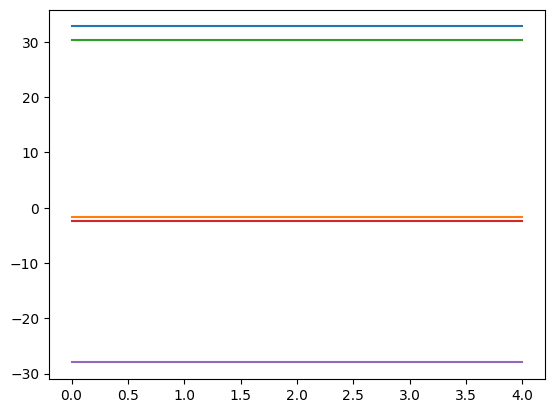

In [7]:
plt.plot(overlaps)